In [2]:
# Import
import torch
import pickle
from torchvision.transforms import v2
import os
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
file = './datasets/Room1/Setting1/episode_0001/episode_0001.pkl'
with open(file, 'rb') as f:
    df = pickle.load(f)
    display(df.head())

/tmp/ipykernel_10440/2962645662.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,robot_1_in_fov,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
1,2,1,2.5,0.0,-2.519039,-0.001258,0.127581,2.670584,-0.176485,True,1.842122,-0.383807,True,4.235651,-0.068437,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
2,2,2,2.5,0.0,-2.548155,-0.007629,0.361895,2.582677,-0.798075,True,1.732859,-0.798642,True,4.125498,-1.023096,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
3,2,3,2.5,0.0,-2.565861,-0.016416,0.690107,2.199055,-1.592699,True,1.417346,-1.303657,True,3.602733,-2.260190,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
4,2,4,2.5,0.0,-2.557894,-0.005556,0.988135,1.613036,-2.161879,False,0.979962,-1.657473,False,2.790085,-3.181508,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
5,2,5,2.5,0.0,-2.544315,0.019972,1.187557,1.121684,-2.430068,False,0.623739,-1.822425,False,2.108319,-3.639857,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0


In [12]:
for setting in range(len(glob('./datasets/Room1/*'))): print(setting + 1)

1
2
3
4
5
6
7
8
9
10


In [18]:
ep_dfs = []
for setting in range(len(glob('./datasets/Room1/*'))):
    set_dir = f'./datasets/Room1/Setting{setting+1}'
    for ep_dir in sorted(glob(f'{set_dir}/episode_*')):     

        ep = ep_dir.split('/')[-1]
        try:
            with open(f'{ep_dir}/{ep}.pkl', 'rb') as f:
                df = pickle.load(f)
                df.insert(0, 'setting', np.ones(df.shape[0], dtype=int) * (setting + 1))
                ep_dfs.append(df)
        except FileNotFoundError:
            print(f'File not found: {ep_dir}/{ep}.pkl')

ep_dfs = pd.concat(ep_dfs)
ep_dfs.index = list(range(0, ep_dfs.shape[0]))

display(ep_dfs.head(-1))

File not found: ./datasets/Room1/Setting1/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting2/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting3/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting4/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting5/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting6/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting7/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting8/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting9/episode_0020/episode_0020.pkl
File not found: ./datasets/Room1/Setting10/episode_0020/episode_0020.pkl


/tmp/ipykernel_10440/1881402173.py:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)
/tmp/ipykernel_10440/1881402173.py:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use t

,setting,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,1,1,1,2.5,0.0,-2.514307,-0.000816,0.148274,-2.930551,0.443405,...,0.704328,-2.297090,False,1.993940,-1.413349,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
1,1,1,2,2.5,0.0,-2.539656,-0.007352,0.387933,-2.747049,1.205342,...,0.170433,-2.424035,False,1.627500,-1.848243,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
2,1,1,3,2.5,0.0,-2.556250,-0.016376,0.689397,-2.231679,2.028156,...,-0.536813,-2.397507,False,1.025008,-2.250144,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
3,1,1,4,2.5,0.0,-2.550434,-0.008632,0.996881,-1.505279,2.616380,...,-1.250351,-2.149803,False,0.287829,-2.453197,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
4,1,1,5,2.5,0.0,-2.537081,0.017273,1.197426,-0.979847,2.852175,...,-1.687909,-1.881922,False,-0.233858,-2.457968,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21958,10,19,88,2.5,0.0,1.880025,0.242383,-0.392265,0.597012,-2.693080,...,-4.160827,0.353580,False,-1.276692,-0.967846,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21959,10,19,89,2.5,0.0,1.928224,0.222466,-0.391350,0.573573,-2.714010,...,-4.193825,0.358549,False,-1.310918,-0.969491,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21960,10,19,90,2.5,0.0,1.976361,0.202591,-0.392108,0.556486,-2.729181,...,-4.227873,0.350652,False,-1.345905,-0.977688,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21961,10,19,91,2.5,0.0,2.024520,0.182341,-0.403450,0.571801,-2.736477,...,-4.277669,0.299631,False,-1.391393,-0.989362,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0


In [19]:
ep_dfs.to_pickle('./datasets/Room1/annotations.pkl')

# 2. Similarity between images

In [3]:
file = './datasets/Room1/annotations.pkl'
with open(file, 'rb') as f:
    ep_dfs = pickle.load(f)
    display(ep_dfs.head())

print(f'Number of recors: {ep_dfs.shape[0]}')

,setting,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,1,1,1,2.5,0.0,-2.514307,-0.000816,0.148274,-2.930551,0.443405,...,0.704328,-2.297090,False,1.993940,-1.413349,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
1,1,1,2,2.5,0.0,-2.539656,-0.007352,0.387933,-2.747049,1.205342,...,0.170433,-2.424035,False,1.627500,-1.848243,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
2,1,1,3,2.5,0.0,-2.556250,-0.016376,0.689397,-2.231679,2.028156,...,-0.536813,-2.397507,False,1.025008,-2.250144,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
3,1,1,4,2.5,0.0,-2.550434,-0.008632,0.996881,-1.505279,2.616380,...,-1.250351,-2.149803,False,0.287829,-2.453197,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
4,1,1,5,2.5,0.0,-2.537081,0.017273,1.197426,-0.979847,2.852175,...,-1.687909,-1.881922,False,-0.233858,-2.457968,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0


Number of recors: 21964


In [4]:
rand_idx = np.random.randint(1, ep_dfs.shape[0] + 1)

anchor_rec = ep_dfs.iloc[rand_idx]
setting = anchor_rec['setting']
ep = anchor_rec['episode']
step = anchor_rec['step']

f"{setting}", f"{ep:04}", f"{step:05}"

('7', '0014', '00005')

In [5]:
anchor_rec

setting                                                              7
episode                                                             14
step                                                                 5
target_point_x                                                     2.5
target_point_y                                                     0.0
robot_pos_x                                                  -2.569073
robot_pos_y                                                  -0.009095
robot_yaw                                                     0.125088
robot_1_rel_pos_x                                             0.818141
robot_1_rel_pos_y                                             0.316202
robot_1_in_fov                                                    True
robot_2_rel_pos_x                                             1.449938
robot_2_rel_pos_y                                             2.633881
robot_2_in_fov                                                   False
robot_

In [6]:
type(anchor_rec.laser_readings['scan'])

numpy.ndarray

In [7]:
other_set_df = ep_dfs[ep_dfs['setting'] != anchor_rec['setting']].copy()
other_set_df

,setting,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
0,1,1,1,2.5,0.0,-2.514307,-0.000816,0.148274,-2.930551,0.443405,...,0.704328,-2.297090,False,1.993940,-1.413349,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
1,1,1,2,2.5,0.0,-2.539656,-0.007352,0.387933,-2.747049,1.205342,...,0.170433,-2.424035,False,1.627500,-1.848243,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
2,1,1,3,2.5,0.0,-2.556250,-0.016376,0.689397,-2.231679,2.028156,...,-0.536813,-2.397507,False,1.025008,-2.250144,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
3,1,1,4,2.5,0.0,-2.550434,-0.008632,0.996881,-1.505279,2.616380,...,-1.250351,-2.149803,False,0.287829,-2.453197,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
4,1,1,5,2.5,0.0,-2.537081,0.017273,1.197426,-0.979847,2.852175,...,-1.687909,-1.881922,False,-0.233858,-2.457968,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,10,19,89,2.5,0.0,1.928224,0.222466,-0.391350,0.573573,-2.714010,...,-4.193825,0.358549,False,-1.310918,-0.969491,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21960,10,19,90,2.5,0.0,1.976361,0.202591,-0.392108,0.556486,-2.729181,...,-4.227873,0.350652,False,-1.345905,-0.977688,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21961,10,19,91,2.5,0.0,2.024520,0.182341,-0.403450,0.571801,-2.736477,...,-4.277669,0.299631,False,-1.391393,-0.989362,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
21962,10,19,92,2.5,0.0,2.072421,0.161526,-0.417072,0.593688,-2.743220,...,-4.353275,0.248270,False,-1.437566,-0.999767,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0


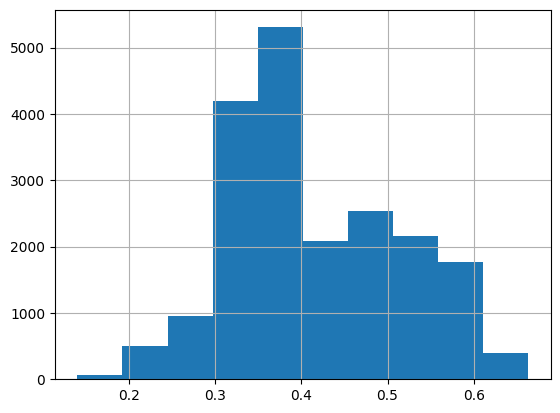

In [8]:
eucledian_dist = other_set_df['laser_readings'].map(lambda x: np.sqrt(np.sum((anchor_rec.laser_readings['scan'] - x['scan'])**2))/np.sqrt(228))
eucledian_dist.hist();

-5 -5


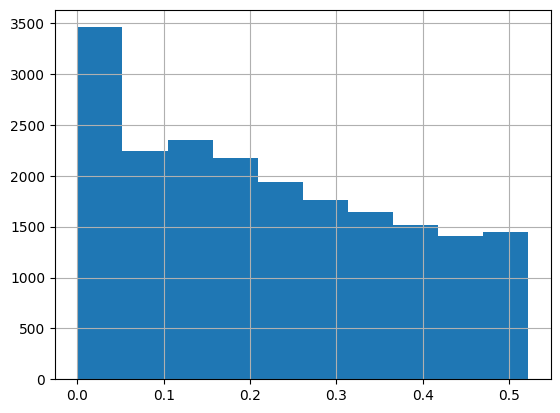

In [9]:
def opposite_corner(x, y):
    opposite_x = -5 if x >= 0 else 5
    opposite_y = -5 if y >= 0 else 5
    return opposite_x, opposite_y

goal_pos_x, goal_pos_y = anchor_rec['target_point_x'], anchor_rec['target_point_y']
corner_x, corner_y = opposite_corner(goal_pos_x, goal_pos_y)
print(corner_x, corner_y)
max_gd = np.sqrt((goal_pos_x - corner_x)**2 + (goal_pos_y - corner_y)**2)

anchor_gd = np.sqrt((anchor_rec['robot_pos_x'] - goal_pos_x)**2 + (anchor_rec['robot_pos_y'] - goal_pos_y)**2)
gd_diffs = other_set_df.apply(lambda x: abs(anchor_gd - np.sqrt((x['robot_pos_x'] - goal_pos_x)**2 + (x['robot_pos_y'] - goal_pos_y)**2)), axis=1)

gd_diffs = gd_diffs / max_gd
gd_diffs.hist();

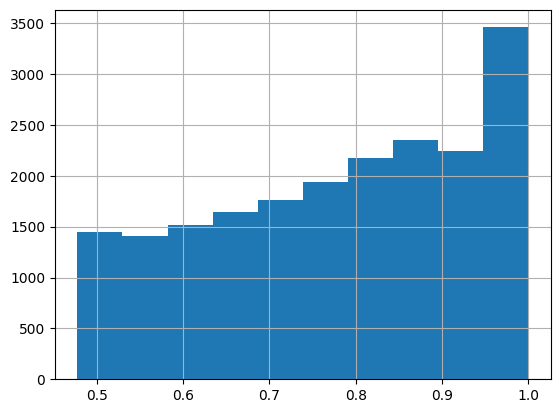

In [10]:
ALPHA = 0.0
sim_scores = ALPHA*(1 - eucledian_dist) + (1-ALPHA)*(1 - gd_diffs)
# sim_scores = (1 - eucledian_dist)*(1 - gd_diffs)
sim_scores.hist();

In [11]:
BASE_NEG_DIST = 0.1
N_NEG_SAMPLES = 12

negative = sim_scores[sim_scores < BASE_NEG_DIST]
while negative.shape[0] < N_NEG_SAMPLES*2:
    BASE_NEG_DIST += 0.001
    negative = sim_scores[sim_scores < BASE_NEG_DIST]

neg_ex = negative.sample(n=N_NEG_SAMPLES)
neg_ex

17499    0.478507
9886     0.478132
111      0.478818
17590    0.477912
9650     0.477950
4626     0.477909
2873     0.477830
11647    0.477874
21519    0.477904
1514     0.478753
18623    0.478429
16932    0.478858
dtype: float64

In [12]:
negative_rec = ep_dfs.iloc[neg_ex.index]
negative_rec

,setting,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
17499,8,18,116,2.5,0.0,2.212384,0.230219,-0.562139,-4.345519,0.367910,...,-2.758024,-2.367503,False,-1.021096,-1.003567,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
9886,5,9,139,2.5,0.0,2.376027,0.343328,-0.628455,-1.486294,-2.457827,...,-2.241502,0.493834,False,-0.525002,-2.640836,False,"{'scan': [[0.10651139], [0.10196869], [0.09780...",6.0,7.0,8.0
111,1,1,112,2.5,0.0,2.148562,0.119537,-0.627573,-6.664137,-4.704813,...,-1.902159,-4.136487,False,-1.125533,-2.289765,False,"{'scan': [[0.16696952], [0.16002116], [0.15365...",6.0,7.0,8.0
17590,8,19,91,2.5,0.0,2.162604,0.134037,-0.376759,0.409477,-2.415885,...,-3.368242,1.340261,False,-1.370061,-3.388242,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
9650,5,7,97,2.5,0.0,2.364956,0.337361,-0.577331,-2.219586,0.560720,...,-2.364488,0.882668,False,0.816980,-3.007857,False,"{'scan': [[0.09319185], [0.08965237], [0.08638...",6.0,7.0,8.0
4626,3,2,141,2.5,0.0,2.408987,0.351422,-0.680008,-1.168296,-2.968053,...,1.941735,-2.012076,True,-3.321587,-1.815491,False,"{'scan': [[0.15742359], [0.14990014], [0.14307...",6.0,7.0,8.0
2873,2,5,99,2.5,0.0,2.369003,0.337793,-0.602546,-1.758642,0.990814,...,-2.500724,-1.786723,False,-1.588691,-2.752434,False,"{'scan': [[0.04869425], [0.049215984], [0.0497...",6.0,7.0,8.0
11647,6,4,108,2.5,0.0,2.151262,0.099672,-0.258469,-2.523891,1.300928,...,-2.404707,2.776358,False,-1.720919,-1.637426,False,"{'scan': [[0.13750522], [0.13490434], [0.13244...",6.0,7.0,8.0
21519,10,15,120,2.5,0.0,2.142799,-0.064443,-0.120397,-4.424946,0.509146,...,-2.527069,0.844388,False,-3.872184,2.211887,False,"{'scan': [[0.7072514], [0.69606197], [0.686945...",6.0,7.0,8.0
1514,1,12,115,2.5,0.0,2.157884,0.142537,-0.593504,-1.021412,-2.428275,...,-2.691652,-0.740463,False,-3.353819,0.341729,False,"{'scan': [[0.16498783], [0.15868273], [0.15287...",6.0,7.0,8.0


In [13]:
neg_imgs = []
for _, neg_rec in negative_rec.iterrows():
    neg_set = neg_rec['setting']
    neg_ep = neg_rec['episode']
    neg_step = neg_rec['step']
    neg_imgs.append((f'./datasets/Room1/Setting{neg_set}/episode_{neg_ep:04}/rgb_{neg_step:05}.png', neg_set, neg_ep, neg_step))

In [14]:
BASE_POS_DIST = 0.99
N_POS_SAMPLES = 4

positive = sim_scores[sim_scores > BASE_POS_DIST]
while positive.shape[0] < N_POS_SAMPLES*2:
    BASE_POS_DIST -= 0.001
    positive = sim_scores[sim_scores > BASE_POS_DIST]

pos_ex = positive.sample(n=N_POS_SAMPLES)
pos_ex

12706    0.990918
21403    0.999963
772      0.998391
6060     0.992991
dtype: float64

In [15]:
positive_rec = ep_dfs.iloc[pos_ex.index]
positive_rec

,setting,episode,step,target_point_x,target_point_y,robot_pos_x,robot_pos_y,robot_yaw,robot_1_rel_pos_x,robot_1_rel_pos_y,...,robot_2_rel_pos_x,robot_2_rel_pos_y,robot_2_in_fov,robot_3_rel_pos_x,robot_3_rel_pos_y,robot_3_in_fov,laser_readings,robot_1_body_id,robot_2_body_id,robot_3_body_id
12706,6,13,10,2.5,0.0,-2.481037,0.248198,1.384539,0.995732,-3.499398,...,1.603454,-2.266495,False,0.696253,-1.427830,False,"{'scan': [[0.083875336], [0.082453415], [0.081...",6.0,7.0,8.0
21403,10,15,4,2.5,0.0,-2.568720,-0.016208,0.171893,0.739991,-0.079101,...,2.714235,0.707712,True,1.551616,1.856691,True,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
772,1,8,3,2.5,0.0,-2.554555,-0.015130,0.757157,0.336813,-3.645530,...,0.713344,-2.249481,False,0.277514,-2.044285,False,"{'scan': [[1.0], [1.0], [1.0], [1.0], [1.0], [...",6.0,7.0,8.0
6060,3,14,3,2.5,0.0,-2.505887,0.011733,0.704925,3.544014,-1.542411,...,0.471100,-0.507695,True,-0.446761,-2.551671,False,"{'scan': [[0.61812776], [0.5576239], [0.511838...",6.0,7.0,8.0


In [16]:
pos_imgs = []
for _, pos_rec in positive_rec.iterrows():
    pos_set = pos_rec['setting']
    pos_ep = pos_rec['episode']
    pos_step = pos_rec['step']
    pos_imgs.append((f'./datasets/Room1/Setting{pos_set}/episode_{pos_ep:04}/rgb_{pos_step:05}.png', pos_set, pos_ep, pos_step))

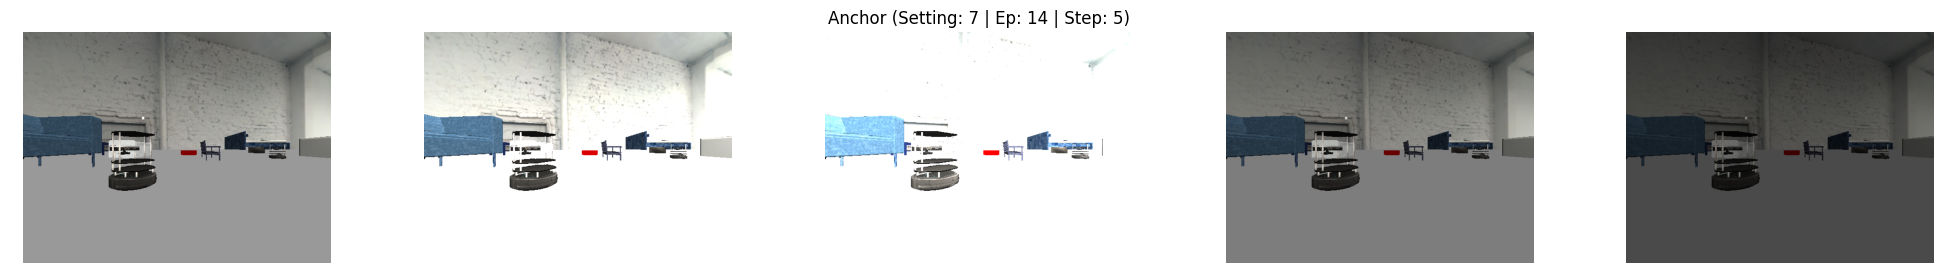

In [17]:
light_transforms = v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ColorJitter(brightness=(1.5,2.0)),
        v2.ToPILImage()
    ])

ul_transforms = v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ColorJitter(brightness=(2.5,3.0)),
        v2.ToPILImage()
    ])


dark_transforms = v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ColorJitter(brightness=(0.7,0.9)),
        v2.ToPILImage()
    ])

ud_transforms = v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ColorJitter(brightness=(0.3,0.5)),
        v2.ToPILImage()
    ])

anc_rgb = Image.open(f'./datasets/Room1/Setting{setting}/episode_{ep:04}/rgb_{step:05}.png')
anc_light = light_transforms(anc_rgb)
anc_ul = ul_transforms(anc_rgb)
anc_dark = dark_transforms(anc_rgb)
anc_ud = ud_transforms(anc_rgb)

plt.figure(figsize=[25,3])
plt.title(f'Anchor (Setting: {setting} | Ep: {ep} | Step: {step})')
plt.axis('off')
plt.subplot(1,5,1)
plt.axis('off')
plt.imshow(anc_rgb)
plt.subplot(1,5,2)
plt.axis('off')
plt.imshow(anc_light)
plt.subplot(1,5,3)
plt.axis('off')
plt.imshow(anc_ul)
plt.subplot(1,5,4)
plt.axis('off')
plt.imshow(anc_dark)
plt.subplot(1,5,5)
plt.axis('off')
plt.imshow(anc_ud);

In [18]:
train_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.uint8, scale=True),
    v2.Resize([232,232]),
    v2.CenterCrop([224,224]),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

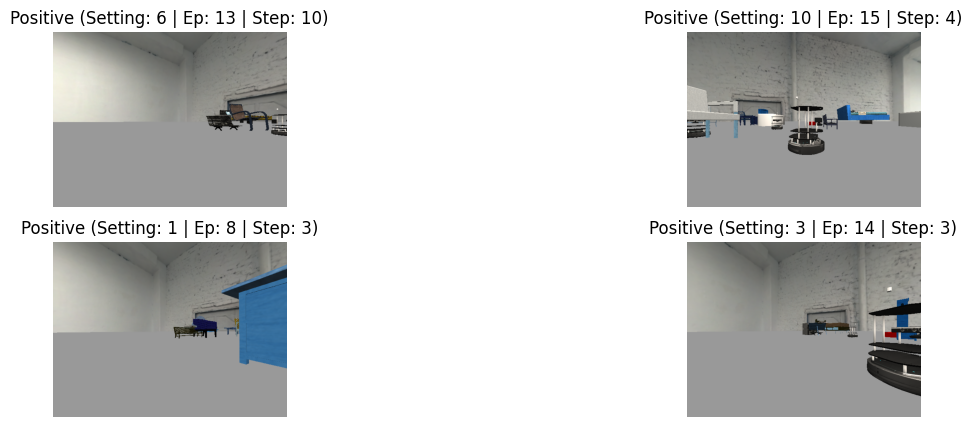

In [19]:
N_ROWS = 2
N_COLS = 2

plt.figure(figsize=[15,5])
for idx, pos in enumerate(pos_imgs):
    img = Image.open(pos[0])
    plt.subplot(N_ROWS, N_COLS, idx+1)
    plt.title(f'Positive (Setting: {pos[1]} | Ep: {pos[2]} | Step: {pos[3]})')
    plt.axis('off')
    plt.imshow(img)
plt.show();

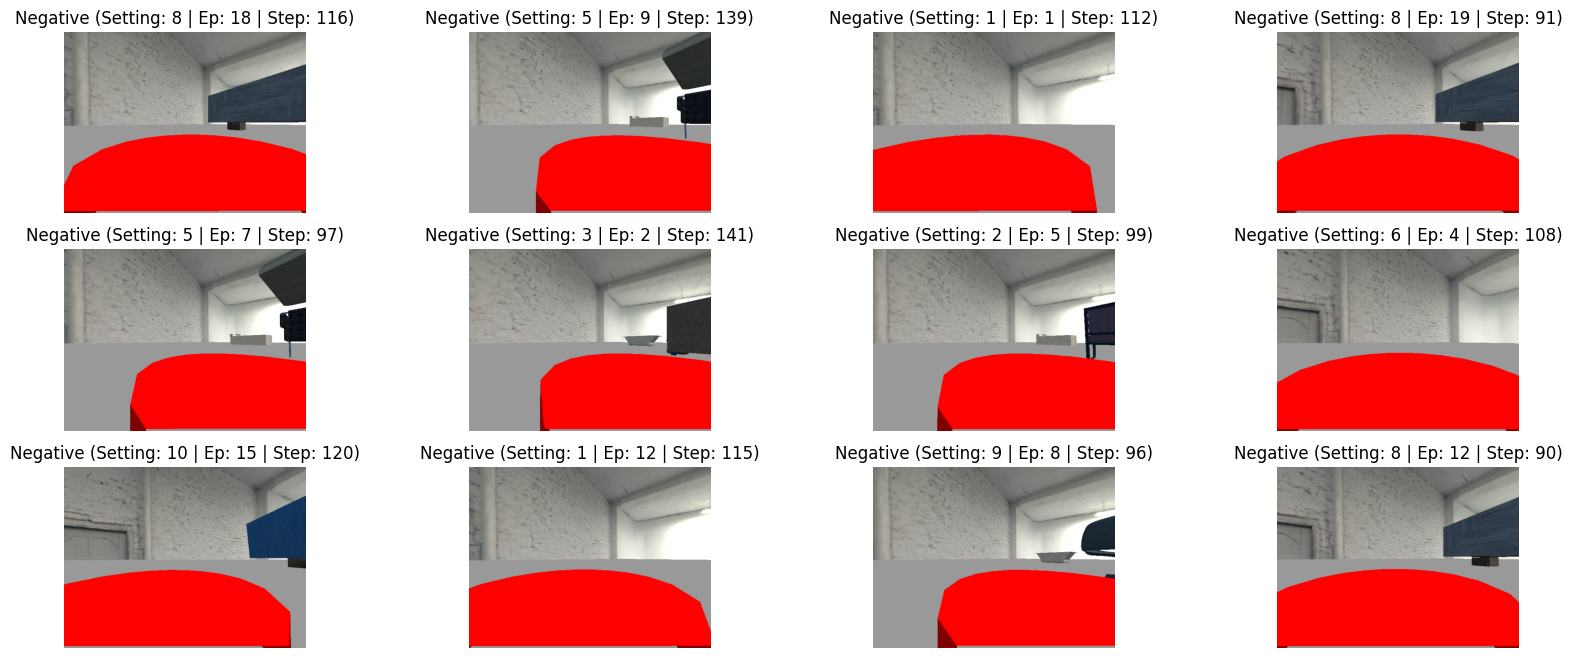

In [20]:
N_ROWS = 3
N_COLS = 4

plt.figure(figsize=[20,8])
for idx, neg in enumerate(neg_imgs):
    img = Image.open(neg[0])
    plt.subplot(N_ROWS, N_COLS, idx+1)
    plt.title(f'Negative (Setting: {neg[1]} | Ep: {neg[2]} | Step: {neg[3]})')
    plt.axis('off')
    plt.imshow(img)
plt.show();